In [4]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

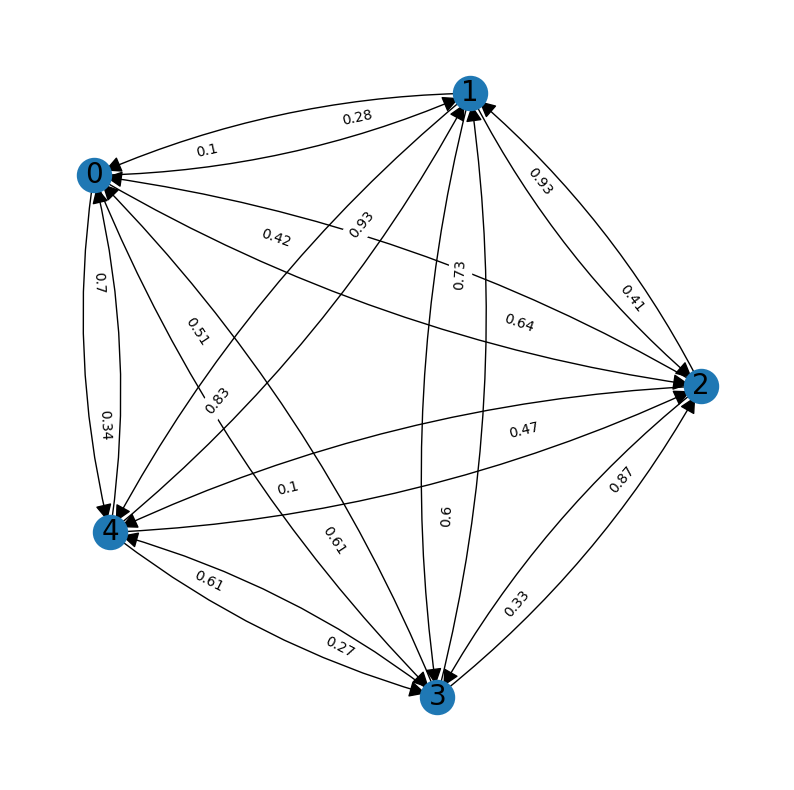

In [17]:
from Simulation import *


click_probabilities = generate_click_probabilities(fully_connected=True)
observations_probabilities = generate_observation_probabilities(click_probabilities=click_probabilities)

concentration_params = [100] + [70] * NUM_OF_PRODUCTS
alpha_users = np.random.dirichlet( alpha= concentration_params, size = 1)


product_prices, users_reservation_prices = generate_prices(product_range=100, users_range=100)

env = Environment(users_reservation_prices = users_reservation_prices,
                    product_prices = product_prices,
                    click_probabilities = click_probabilities,
                    observations_probabilities = observations_probabilities)

Network.print_graph(G=env.network.G)

In [18]:
env.get_product_prices()

array([75.72, 14.14, 51.9 , 57.27, 96.71])

In [19]:
from social_influence import *
nodes_activation_probabilities = montecarlo_sampling(env)

k: 100%|██████████| 4688/4688 [00:02<00:00, 1701.16it/s]


In [46]:
from Ecommerce import *

In [26]:
B_cap = 200
ecomm = Ecommerce(B_cap = B_cap)
ecomm.alpha_bars


array([0.19, 0.18, 0.2 , 0.2 , 0.13, 0.1 ])

In [48]:
arr = np.array([1,2,3,4,5])

In [47]:
ecomm.solve_optimization_problem(env = env, nodes_activation_probabilities=nodes_activation_probabilities)

[116.22929394 134.85991041  94.678718    73.1230802  101.86434514]
[[ 0.          1.79106694  3.53009043  5.17226194  6.68503217  8.04984472
   9.2609236  18.         18.         18.         18.        ]
 [ 0.          1.99335989  3.9475064   5.82625225  7.59897925 20.
  20.         20.         20.         20.         20.        ]
 [ 0.          1.81818182  3.33333333  4.61538462  5.71428571  6.66666667
  20.         20.         20.         20.         20.        ]
 [ 0.          1.28946348  2.51919698  3.64456982  4.64271999 13.
  13.         13.         13.         13.         13.        ]
 [ 0.          1.          2.          3.          4.          5.
   6.          7.         10.         10.         10.        ]]
-------MATRIX---------
[[   0.          208.17444612  410.29991852  601.16835339  776.99656961
   935.62776803 1076.39061101 2092.12729096 2092.12729096 2092.12729096
  2092.12729096]
 [   0.          268.82433652  532.36036005  785.72785633 1024.7976602
  2697.19820819 